### Explaining and Harnessing Adversarial Examples
Code 참조: <a href="https://www.tensorflow.org/tutorials/generative/adversarial_fgsm?hl=ko">Adversarial example using FGSM</a><br>
논문 참조: <a href="https://arxiv.org/pdf/1412.6572.pdf">EXPLAINING AND HARNESSING ADVERSARIAL EXAMPLES</a><br>

해당 Post의 제목에서도 알 수 있듯이 Adversarial Examples에 대하여 활용하는지에 대해서 설명하는 Paper와 Code이다. 이를 위해서 먼저 Adversarial Example이란 무엇인지 사전지식으로 알 고 있어야 한다.  

#### (1) Adversarial Example
Adversarial Example에 대해서 먼저 사진으로 살펴보면 다음과 같다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/45.png" height="100%" width="100%" /></div><br>
기본적으로 Training된 Model은 57.7%의 Panda라고 Classify를 하나 8.2%의 nematode라고 판단되는 Noise를 합침으로 인하여 gibbon이라고 99.3% 판단하게 된다.  

즉, **Adversarial Example은 Original Image + Pertubation(매우 작은 Noise) -> Model의 오분류**를 일으키는 Example이다.  


#### (2) INTRODUCTION
> ...  
The cause of these adversarial examples was a mystery, and speculative explanations have suggested it is due to extreme nonlinearity of deep neural networks, perhaps combined with insufficient model averaging and insufficient regularization of the purely supervised learning problem.  
We show that these speculative hypotheses are unnecessary. 
Linear behavior in high-dimensional spaces is sufficient to cause adversarial examples.  
This view enables us to design a fast method of generating adversarial examples that makes adversarial training practical.  
...
>

해당 논문의 Introduction에서 개인적으로 가장 중요하다고 생각하는 문제이다.  
**현재 많은 Model에서는 Adversarial Example에 대한 대책이 존재하지 않다.**  
많은 이들은 이러한 문제의 원인을 크게 2가지로 설명하고 있다.
1. extreme nonlinearity of deep neural networks: DNN의 극심한 비선형성 때문이다.
2. combined with insufficient model averaging and insufficient regularization of the purely supervised learning problem: 불충분한 Model의 정규화 때문이다.

하지만 해당논문에서는 1이 문제가 아니라는 것을 Linear한 Model의 고차원에서 같은 문제가 발생하는 것을 보여줌으로써 Adversarial Example은 2번에 Focus를 맞추고 해결하며 된다고 주장하고 있다.  
2번의 정규화의 문제는 이전까지는 Dropout으로서 해결하려 하였으나, 현재 논문에서는 이것보다 좋은 방법을 제시하여 Adversarial Example을 해결하는 것을 목표로 하고 있다.

#### (3) THE LINEAR EXPLANATION OF ADVERSARIAL EXAMPLES
해당 논문은 위에서 Adversarial Example의 문제가 DNN의 비선형성이 아니라는 것을 고차원의 선형성에서도 이러한 문제가 발생함으로써 보인다고 하였다.  
이러한 문제는 간단하게 나타낼 수 있다.  
먼저 Adversarial Example은 Original Image + Pertubation라고 표현하였고 각각을 다음과 같이 나타내어 보자.
- Adversarial Example: <span>$\bar{x}$</span>
- Original Image: <span>$x$</span>
- Pertubation: <span>$\eta$</span>

<p>$$\bar{x} = x + \eta$$</p>
위와 같은 식을 Linear한 Model에 넣게 되면 다음과 같이 변형된다.  
<p>$$w^{T}\bar{x} = w^{T}x + w^{T}\eta$$</p>

**Adversarial Example은 위의 식에서 Pertubation에 해당하는 <span>$w^{T}\eta$</span>의 값이 매우 커져서 Model이 잘못된 Prediction을 한다고 생각할 수 있다.**  
따라서 <span>$w^{T}\eta$</span>이 최대로 만들기 위하여 max norm constraint를 적용한다(Linear한 Model은 High Dimension이라는 가정이 있기 때문에 L1 norm, L2 norm이 아닌 max norm constraint를 적용한다).  
<p>$$||x||_{\infty} = max_{1 \le i \le n}|x_i|$$</p>
위의 식에 적용한다면 <span>$\eta = \epsilon sign(w)$</span>일 때 <span>$w^{T}\eta$</span>의 값은 매우 커질 것 이다.  

<p>$$\therefore w^{T}\eta = w^{T} \epsilon sign(w) = \epsilon||w||$$</p>
위의 w의 절대값의 평균을 m이라고 한다면 최종적인 식은 다음과 같다.  
<p>$$w^{T}\eta = \epsilon m n\text{(n은 w의 Dimension)}$$</p>
위의 식에서 <span>$\epsilon$</span>이 매우 작은수라고 하여도 High Dimension의 경우 n값이 커짐으로 인하여 <span>$w^{T}\eta$</span>의 값은 매우 커질 것이다.  

**최종적으로 정리하게 되면, Noise의 값이 작은 값이여도 High Dimension Linear Model에서는 Adversarial Example이 발생할 수 있다.**  

**참고사항 (Nrom의 종류)**  
<p>$$\text{(In all definitions below, )} x = (x_1, x_2, ..., x_n))$$</p>

1. The L1 norm: <span>$||x||_1 = \sum_{i=1}^{n}|x_i|$</span>
2. The L2 norm: <span>$||x||_2 = \sqrt{\sum_{i=1}^{n}x_i^2}$</span>
3. The infinity norm(or max-norm): <span>$||x||_{\infty} = max_{1 \le i \le n} |x_i|$</span>
4. (Less common) Lp norm: <span>$||x||_p = (\sum_{i=1}^{n}|x_i|^p)^{\frac{1}{p}}$</span>

#### (4) LINEAR PERTURBATION OF NON-LINEAR MODELS
예측하기 힘든 문제 혹은 Linear한 상태로는 해결할 수 없는 문제(ex) XOR 문제)를 해결하기 위하여 우리는 **비선형인 Activation Function을 사용하여 DNN Model을 사용하였다. 하지만, 해당논문에서는 이러한 DNN의 Model은 Linear한 특성이 많다고 얘기하고 있고, 이러한 결과로 인하여 Adversarial Examples에 취약하다고 이야기 한다.  
또한 논문에서는 이러한 DNN이 Linear한 특성을 가지고 있다는 것을 Linear Adversarial Example을 만들어서 보여주었으며 이러한 Linear Adversarial Example을 생성하는 방법이 이번 post의 제목과도 같은 FGSM(Fast Gradient Sign Method)이다.**  
FGSM의 식은 다음과 같다.  
- <span>$x$</span>: input
- <span>$y$</span>: target
- <span>$\theta$</span>: hyper parameter
- <span>$J(\theta,x,y)$</span>: cost function
- <span>$\epsilon$</span>: Noise의 크기(사용자가 지정, 매우 작은 값)

<p>$$\eta = \epsilon sign(\triangledown_x J(\theta,x,y))$$</p>
위와 같은 식으로서 FGSM을 생성하고 <span>$\bar{x} = x + \eta$</span>로서 Adversarial Example이 생성된다고 얘기하고 있다.  



#### (5) ADVERSARIAL TRAINING OF LINEAR MODELS VERSUS WEIGHT DECAY
위에서 FGSM을 실제 Model에 넣었을 경우를 예를들어보자.  
현재 논문에서 예시로 들고있는 조건과 식은 다음과 같다.  
- <span>Model</span>: Logistic Regression
- <span>Cost Function</span>: Cross Entropy
- <span>Activation Function$\sigma(x)$</span>: Sigmoid
- <span>$y \in {-1,1}$</span>: Label

다음과 같이 조건이 주어질 경우, <span>$P(y=1) = \sigma(w^{T}x+b)$</span>가 될 것이고 **Training Consists of Gradient Descent는 다음과 같은 식이 될 것이다.**  
<p>$$\mathbb{E}_{x,y \text{~} p_{data}} \zeta(-y(w^{T}x + b))$$</p>
<p>$$\zeta(z) = log(1+exp(z))$$</p>
먼저 위와 같은 식이 어떻게 나왔는지 생각해보자.  
Activation Sigmoid Function을 통하여 Cross Entropy의 식은 아래와 같다.  
<p>$$-zlog(\sigma(x))-(1-z)log(1-\sigma(x))$$</p>
위의 식을 변형하여 논문과 같은 식을 얻고자 하면 다음과 같다.  
<p>$$-zlog(\sigma(x))-(1-z)log(1-\sigma(x))$$</p>

<p>$$= -zlog(\frac{1}{1+e^{-x}})-(1-z)log(\frac{e^{-x}}{1+e^{-x}})$$</p>

<p>$$= zlog(1+e^{-x})+(1-z)(log(1+e^{-x})-log(e^{-x}))$$</p>

<p>$$= zlog(1+e^{-x})+(1-z)(log(1+e^{-x})+x)$$</p>

<p>$$= x - xz + log(1+e^{-x})$$</p>
위의 식에서 <span>$log(1+e^{-x})$</span>의 그래프를 살펴보게 되면 Overflow가 발생할 위험이 높다는 것을 알 수 있다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/46.png" height="50%" width="50%" /></div><br>

<p>$$= x-xz + log(1+e^{-x}) = log(e^x)-xz+log(1+e^{-x}) = -xz + log(1+e^{x})$$</p>
 
최종적인 위의 식에서 조건인 <span>$y \in {-1,1}$</span>을 각각 대입하면 최종적인 식은 다음과 같다.  

위의 식 <span>$-xz + log(1+e^{x})$</span>에 <span>$z=1$</span>을 대입하면 최종적인 식은 다음과 같다.  

**if <span>$y=1 \rightarrow z(\sigma(w^{T}x+b)) = 1$</span>**    
<p>$$-xz + log(1+e^{x}) = -x + log(1+e^{x}) = log(1+e^{-x}) = log(1+e^{-yx})$$</p>

**if <span>$y=-1 \rightarrow z(\sigma(w^{T}x+b)) = 0$</span>**    
<p>$$-xz + log(1+e^{x}) = log(1+e^{x}) = log(1+e^{-yx})$$</p>

따라서 최종적인 식은 <span>$x = w^{T}x+b$</span>을 대입하면 다음과 같다.  
<p>$$\therefore log(1+e^{-y(w^{T}x+b)})$$</p>
<br>

이제 위에서 구한 식으로 인하여 Adversarial Example을 만드는 과정을 유도하도록 하자.  
위에서 Adversarial Example을 다음과 같이 정의하였다.  
<p>$$\bar{x} = x + \eta$$</p>
<p>$$\eta = \epsilon sign(\triangledown_x J(\theta,x,y))$$</p>
위의 두 식을 활용하기 위하면 다음과 같은 식이 유도될 수 있다.  

**(1) <span>$\eta = -\epsilon sign(w)$</span>**  

<p>$$\eta = \epsilon sign(\triangledown_x J(\theta,x,y))$$</p>
<p>$$ = \epsilon sign(\triangledown_x \zeta(-y(w^{T}x + b))$$</p>
위의 식에서 <span>$f(x) = g(h(x)) \rightarrow f(x)^{'} = h(x)^{'}g(h)^{'}$</span>를 활용하며 다음과 같은 식이 성립한다.  
<p>$$\triangledown_x \zeta(-y(w^{T}x + b) = -yw*e^{-y(w^{T}x+b)}*\frac{1}{1+e^{-y(w^{T}x+b)}}$$</p>
위의 식에서 <span>$\frac{1}{1+e^{-y(w^{T}x+b)}}$</span>는 Sigmoid의 식이므로 항상 양수, <span>$e^{-y(w^{T}x+b)}$</span>는 지수함수로서 항상 양수 인 것을 확인할 수 있다.  
y의 값을 다시한번 확인하고 적용하면 다음과 같다.  

**if <span>$y=1 \rightarrow \frac{1}{1+e^{-y(w^{T}x+b)}} = 1$</span>**    
<p>$$\eta = \epsilon sign(\triangledown_x J(\theta,x,y)) = -\epsilon sign(w)$$</p>

**if <span>$y=-1 \rightarrow \frac{1}{1+e^{-y(w^{T}x+b)}} = 0$</span>**    
<p>$$\eta = \epsilon sign(\triangledown_x J(\theta,x,y)) = 0$$</p>

<p>$$\therefore \eta = -\epsilon sign(w)$$</p>

**(2) <span>$\mathbb{E}_{x,y \text{~} p_{data}} \zeta(-y(w^{T}\bar{x} + b)) = \mathbb{E}_{x,y \text{~} p_{data}} \zeta(y(\epsilon||w||_1 -w^{T}x - b))$</span>**  

<p>$$\bar{x} = x + \eta = x -\epsilon sign(w) $$</p>
<p>$$-y(w^{T}\bar{x} + b) = -y(w^{T}(x -\epsilon sign(w)) + b)$$</p>
<p>$$ = -y(w^{T}x - \epsilon w^{T}sign(w) + b)$$</p>
<p>$$= y(\epsilon||w||_1 -w^{T}x - b)$$</p>
<p>$$\therefore \mathbb{E}_{x,y \text{~} p_{data}} \zeta(-y(w^{T}\bar{x} + b)) = \mathbb{E}_{x,y \text{~} p_{data}} \zeta(y(\epsilon||w||_1 -w^{T}x - b))$$</p>
<br>

논문에서는 최종적으로 구한 위의 식을 다음과 같이 표현하고 있다.  
>This is somewhat similar to L1 regularization.  
However, there are some important differences.  
Most significantly, the L1 penalty is subtracted off the model’s activation during training, rather than added to the training cost.  
This means that the penalty can eventually start to disappear if the model learns to make confident enough predictions that ζ saturates.  This is not guaranteed to happen—in the underfitting regime, adversarial training will simply worsen underfitting.  
We can thus view L1 weight decay as being more “worst case” than adversarial training, because it fails to deactivate in the case of good margin.
>

개인적으로 이해가 잘 안되지만 다음과 같이 해석하였다.  
위의 최종적인 식은 <span>$\mathbb{E}_{x,y \text{~} p_{data}} \zeta(y(\epsilon||w||_1 -w^{T}x - b))$</span>은 L1 Regularization과 식이 매우 유사하게 되어있다.  
하지만 L1 Regularization의 식으로서 나타내면 다음과 같은 차이를 보이고 있다.    
- L1 Resularization: <span>$Cost = \frac{1}{n}\sum_{i=1}^{n}{L(y_i,\bar{y(x)})+\frac{\lambda}{2}|w|}$</span>
- Adversarial Example: <span>$Cost = \frac{1}{n}\sum_{i=1}^{n}{L(y_i,\bar{y(x+|w|))}}$</span>

위의 식이 정확하지는 않으나 이해되게 쉽게 적었다.  
위의 식에서 <span>$\lambda$</span>는 매우 작은값으로서 Training과정에서 L1 Regularization의 값은 점점 0이되면서 Training이 진행되는 것을 알 수 있다.  
**하지만 Adversarial Example에서는 LossFunction + <span>$\lambda$</span>가아닌 LossFunction의 Input에 추가적으로 <span>$\lambda$</span>가 들어감으로 인하여 추가적인 Bias값이 생기고 그로 인하여 High Bias -> 즉, Underfitting의 위험이 매우 크다는 것을 알 수 있다.**

#### (6) ADVERSARIAL TRAINING OF DEEP NETWORKS
(5) ADVERSARIAL TRAINING OF LINEAR MODELS VERSUS WEIGHT DECAY에서는 간단하게 **Linear한 Model인 경우에서 Adversarial Training을 어떻게 진행하는지 살펴보았다.**  
이번 Chapter는 실제 DeepLearning Network에서 어떻게 Adversarial Training을 진행하는지 알아보자.  
논문에서는 DNN의 Adversarial Training에 관해서 다음과 같이 설명하고 있다.  
DNN은 일반적인 Linear한 Model에 비하여 Layer가 많기 때문에 비선형적일 확률이 높음으로 인하여 Adversarial Training에 저항할 확률이 높다.  
>Szegedy et al. (2014b) showed that by training on a mixture of adversarial and clean examples, a
neural network could be regularized somewhat. Training on adversarial examples is somewhat different from other data augmentation schemes; usually, one augments the data with transformations
such as translations that are expected to actually occur in the test set.

위의 인용문을 살펴보게 되면 Clean Image + Noise가 섞인 Image로 인하여 좀더 Regularization에서 강점을 보인다고 한다.  
이러한 방식은 L-BFGS기법을 사용하나 Resource가 너무 많이 들기 때문에 해당 논문에서는 다음과 같이 **FGSM에 근거한 정규화에 효율적인 Adversarial Object Function**을 제공한다.  
<p>$$\bar{J}(\theta,x,y) = \alpha J(\theta,x,y)+ (1-\alpha)J(\theta,x+\epsilon sign(\triangledown_x J(\theta,x,y)))$$</p>
<span>$\alpha$</span>값은 사용자가 지정하는 값이나 해당논문에서는 0.5로 두고 실험하였다고 한다.  
이러한 결과는 89.4%의 Error Rate에서 17.9%의 Error Rate로서 줄어드는 효과를 발생하게 하였다.  

<br><br>

### Adversarial example using FGSM
Tensorflow 2.0에서 제공하는 <a href="https://www.tensorflow.org/tutorials/generative/adversarial_fgsm?hl=ko">Adversarial example using FGSM</a>을 통하여 실제 Adversarial Example을 생성하고 논문처럼 Model이 잘못 Classify하는지 살펴보자.  

<br>

#### Import Library

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

# matplotlib.rcParams로 matplotlib의 Default Value를 설정한다.
mpl.rcParams['figure.figsize'] = (4, 4)
mpl.rcParams['axes.grid'] = False

#### Load Model and Prediction of Clear Image
Image를 Classify하는 Model을 Load한 뒤 Pertubation가 없는 Clear한 Image를 Prediction하는 결과를 살펴본다.

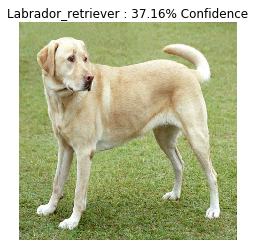

In [2]:
# ImageNet으로서 Pretraining된 MobileNetV2 Model을 가져온다.
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')

# Model의 Weight를 Update시키지 않는다. -> Prediction만 확인하기 때문이다.
pretrained_model.trainable = False

# Prediction의 결과를 확인하기 위해서 Label을 가져온다.
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

# MobileNetV2에 넣기 위한 Data의 전처리 과정이다.
def preprocess(image):
    # Float Type으로서 변경
    image = tf.cast(image, tf.float32)
    # Image를 0 ~ 1 사이의 값으로서 정규화
    image = image/255
    # Image의 Size를 Model에 맞게 224,224로서 변경
    image = tf.image.resize(image, (224, 224))
    # Batch로서 Input을 받으므로 Dimesnion 증가
    image = image[None, ...]
    return image

# ImageNet이 Softmax로서 출력한 결과를 Label과 Mapping하는 역할을 한다.
def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

# MobileNetV2에 넣을 Image를 가져온다.
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

# Data 전처리 -> Prediction
image = preprocess(image)
image_probs = pretrained_model.predict(image)

# Prediction한 결과를 Label로서 Image를 Visualization하여 결과를 확인한다.
plt.figure()
plt.axis('off')
# 전처리 과정에서 Batch처리를 하였으므로 image[0]을 가져와서 확인하여야 한다.
plt.imshow(image[0])
# Image Class: MobileNetV2에서 예측한 Class
# Class Confidenct: MobileNetV2의 Softmax의 값
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

#### Prediction of Adversarial Example
Adversarial Example을 생성하고 Model에서는 어떻게 Prediction하는지 살펴본다.  
위의 논문에서 설명한 FGSM의 식은 다음과 같다.  
- <span>$x$</span>: input
- <span>$y$</span>: target
- <span>$\bar{x}$</span>: adversarial example
- <span>$\theta$</span>: hyper parameter
- <span>$J(\theta,x,y)$</span>: cost function
- <span>$\epsilon$</span>: Noise의 크기(사용자가 지정, 매우 작은 값)

<p>$$\eta = \epsilon sign(\triangledown_x J(\theta,x,y))$$</p>
<p>$$\bar{x} = x + \eta$$</p>

아래 Code에서 어떻게 Mapping하는지 살펴보면 다음과 같다.  

**create_adversarial_pattern()**  
위의 Function은 <span>$sign(\triangledown_x J(\theta,x,y))$</span>을 Return한다.  
위에서 설명한 식과 Mapping하면 다음과 같다.  
- <span>$x$</span>: <code>input_image</code>
- <span>$y$</span>: <code>input_label</code>
- <span>$J()$(loss_object)</span>: <code>tf.keras.losses.CategoricalCrossentropy()</code>
- <span>$J(\theta,x,y)$(loss)</span>: <code>loss_object(input_label, prediction)</code>
- <span>$\triangledown_x J(\theta,x,y)$(gradient)</span>: <code>tape.gradient(loss, input_image)</code>
- <span>$sign(\triangledown_x J(\theta,x,y))$(signed_grad)</span>: <code>tf.sign(gradient)</code>

위의 Function으로서 <span>$sign(\triangledown_x J(\theta,x,y))$</span>을 얻을 수 있다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


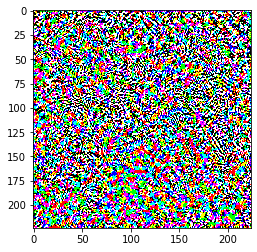

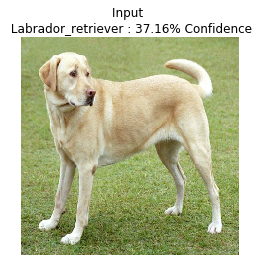

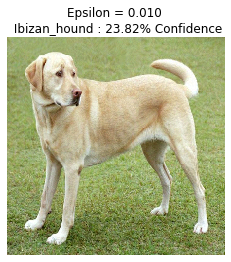

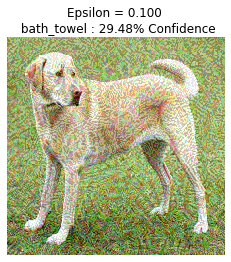

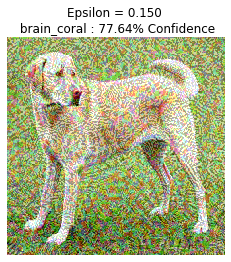

In [3]:
# Loss Object인 J()를 선언한다.
loss_object = tf.keras.losses.CategoricalCrossentropy()

# 최종적으로 𝑠𝑖𝑔𝑛(▿𝑥𝐽(𝜃,𝑥,𝑦))을 구하는 Fucntion이다.
def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        # ▿𝑥을 위하여 Input Image에 대하여 미분해야 한다.
        tape.watch(input_image)
        # Model의 Prediction값을 구한다. 실제 Loss Object의 값을 구하기 위하여
        prediction = pretrained_model(input_image)
        # 𝐽(𝜃,𝑥,𝑦)을 구하는 과정이다.
        loss = loss_object(input_label, prediction)
    
    # ▿𝑥𝐽(𝜃,𝑥,𝑦)을 구하는 과정이다.
    gradient = tape.gradient(loss, input_image)
    # 𝑠𝑖𝑔𝑛(▿𝑥𝐽(𝜃,𝑥,𝑦))을 구하는 과정이다.
    signed_grad = tf.sign(gradient)
    return signed_grad

# MobileNetV2의 결과는 Softmax의 값으로서 나오게 되므로 
# 실제 Loss Object에 넣기 위한 Label을 선언하여야 한다.
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])

# 𝑠𝑖𝑔𝑛(▿𝑥𝐽(𝜃,𝑥,𝑦))을 구하고 Visualization하는 과정이다.
perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0])

# Image와 Model Prediction의 결과를 Visualization하는 역할이다.
def display_images(image, description):
    _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
    plt.figure()
    plt.axis('off')
    plt.imshow(image[0])
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
    plt.show()

# 𝜖의 값을 다양하게 준다. eps = 0 이면 Input으로서 값을 대입
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

# 최종적인 Adversarial Example을 생성하고 결과를 확인한다.
for i, eps in enumerate(epsilons):
    # 𝑥 = x+ 𝜖𝑠𝑖𝑔𝑛(▿𝑥𝐽(𝜃,𝑥,𝑦)) 로서 Adversarial Example을 생성한다.
    adv_x = image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, 0, 1)
    display_images(adv_x, descriptions[i])